# Travelling Sales Person (TSP)

In dieser Übung wird eine Lösung für das TSP implementiert.

Die Funktion `tsp_cities()` liefert die notwendigen Daten.
Über die Helfer `ctoi` (city to index) und `itoc`(index to city) können sie einfach auf die Informationen (Position und Distanz zwischen den Städten) zugreifen.

Zur Visualisierung benutzen wir hier das [cartopy](https://scitools.org.uk/cartopy/docs/latest/) package.

In [56]:
from softcomputing.datasets import *
city_names, city_pos, city_dists = tsp_cities()
len(city_names)
len(city_pos)

21

In [57]:
# city to index
ctoi = { k:i for i,k in enumerate(city_names) }
ctoi

{'London': 0,
 'Paris': 1,
 'Berlin': 2,
 'Madrid': 3,
 'Rome': 4,
 'Athens': 5,
 'Stockholm': 6,
 'Oslo': 7,
 'Warsaw': 8,
 'Amsterdam': 9,
 'Vienna': 10,
 'Dublin': 11,
 'Prague': 12,
 'Brussels': 13,
 'Budapest': 14,
 'Lisbon': 15,
 'Helsinki': 16,
 'Copenhagen': 17,
 'Zurich': 18,
 'Reykjavik': 19,
 'St Petersburg': 20}

In [58]:
# index to city
itoc = { i:k for i,k in enumerate(city_names) }
itoc

{0: 'London',
 1: 'Paris',
 2: 'Berlin',
 3: 'Madrid',
 4: 'Rome',
 5: 'Athens',
 6: 'Stockholm',
 7: 'Oslo',
 8: 'Warsaw',
 9: 'Amsterdam',
 10: 'Vienna',
 11: 'Dublin',
 12: 'Prague',
 13: 'Brussels',
 14: 'Budapest',
 15: 'Lisbon',
 16: 'Helsinki',
 17: 'Copenhagen',
 18: 'Zurich',
 19: 'Reykjavik',
 20: 'St Petersburg'}

In [59]:
city_dists

array([[   0,  340,  930, 1260, 1440, 2400, 1440, 1160, 1450,  360, 1240,
         460, 1040,  320, 1450, 1590, 1830,  960,  780, 1890, 2110],
       [ 340,    0,  880, 1050, 1110, 2100, 1550, 1340, 1370,  430, 1040,
         780,  890,  260, 1250, 1450, 1910, 1030,  490, 2240, 2170],
       [ 930,  880,    0, 1870, 1180, 1800,  810,  840,  520,  580,  520,
        1320,  280,  650,  690, 2320, 1110,  360,  670, 2400, 1330],
       [1260, 1050, 1870,    0, 1370, 2380, 2600, 2390, 2290, 1480, 1810,
        1450, 1780, 1320, 1980,  500, 2950, 2070, 1250, 2890, 3200],
       [1440, 1110, 1180, 1370,    0, 1050, 1980, 2010, 1320, 1300,  760,
        1890,  920, 1170,  810, 1870, 2200, 1530,  680, 3310, 2350],
       [2400, 2100, 1800, 2380, 1050,    0, 2410, 2610, 1600, 2170, 1280,
        2860, 1530, 2090, 1120, 2860, 2470, 2140, 1620, 4170, 2490],
       [1440, 1550,  810, 2600, 1980, 2410,    0,  420,  810, 1130, 1240,
        1630, 1060, 1280, 1320, 2990,  400,  520, 1470, 2140,  690],

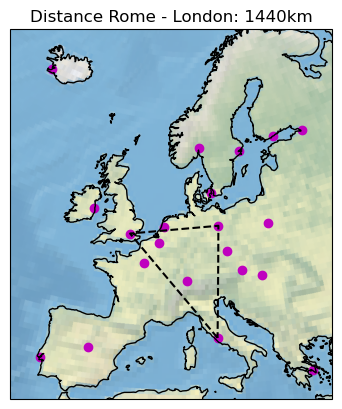

In [61]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure()
# draw europe
ax = plt.axes(projection=ccrs.EuroPP())
ax.coastlines()
ax.stock_img()
# mark cities
plt.scatter(*city_pos.T, transform=ccrs.Geodetic(), c='m', marker='o')
# plot a trip from Rome to London to Berlin and back to Rome
plt.plot(*city_pos[[ctoi["Rome"],
                    ctoi["London"],
                    ctoi["Berlin"],
                    ctoi["Rome"]]].T, '--k', transform=ccrs.Geodetic())
# access distance
plt.title("Distance Rome - London: %dkm" % city_dists[ctoi["Rome"], ctoi["London"]])
plt.show()

# Vorbereitung

1) Finden Sie eine geeignete Kodierung (Genotyp) für das Problem. Achten Sie darauf, dass eine valide Lösung jede Stadt genau einmal besucht und in derselben Stadt endet in der sie begonnen hat.

In [66]:
import numpy as np

2) Erstellen Sie eine geeignete Funktion, die aus Ihrer Kodierung (Genotyp) ein neues Individuum erzeugt (Phänotyp). (Anmerkung: abhängig von der Kodierung kann dies trivial sein!)
   

3) Erstellen Sie eine geeignete Fitness-Funktion welche Ihre Lösung bewertet.

In [68]:
london = ctoi["London"]
berlin = ctoi["Berlin"]

city_dists[london, berlin]

#list mit zeros
sol = zeros_array = np.zeros(21,dtype=int)

def fitness(sol,cost_matrix):
    #Bestrafung -> Anzahl fehlender Städte in der Reise
    penty = len(set(np.arange(len(sol))).difference(set(sol)))
    #Summe der paarweisen Distanzen zwischen keweils zwei benachteren Städten
    #Rundreise!->Letzte Stadt ->erste Stadt
    return -np.log(np.sum([cost_matrix[i,j] for i,j in zip(sol, np.concatenate(sol[1:],sol[1:]))])) - penty

sol_wrong = np.zeros(len(sol),dtype=int)
sol_wrong = sol.copy()
sol_wrong[5] = 0
fitness(sol_wrong,city_dists)

TypeError: only integer scalar arrays can be converted to a scalar index

In [69]:
sol
#indizis von Städte in eine Reihefolge

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

4) Implementieren Sie eine Funktion, die Ihre Lösung auf der Karte einzeichnet.

In [11]:
def plot_solution(sol):
    plt.figure()
    # draw europe
    ax = plt.axes(projection=ccrs.EuroPP())
    ax.coastlines()
    ax.stock_img()
    # mark cities
    plt.scatter(*city_pos.T, transform=ccrs.Geodetic(), c='m', marker='o')
    # plot the trip
    round_trip = np.concat((sol),sol[:1]))
    plt.plot(*city_pos[round_trip].T, '--k', transform=ccrs.Geodetic())
    # access distance
    plt.title("Distance Rome - London: %dkm" % city_dists[ctoi["Rome"], ctoi["London"]])
    plt.show()

plot_solution

SyntaxError: unmatched ')' (764811566.py, line 10)

# Implementierung EA

1) Initialisieren Sie eine Startpopulation.

In [29]:
def init_pop(pop_size,city_len):
    #replace = False, ziehen ohne zurück
    return np.asarray([np.random.choice(city_len,size=city_len,replace=False) for _ in range (pop_size)])

n=len(city_names)
pop=init_pop(30, len(city_names))

In [30]:
f_pop = np.asarray

In [31]:
f_pop = np.asarray([fitness(i,city_dists) for i in pop])
plt.scatter(np.arange(len(f_pop)),f_pop)

NameError: name 'fitness' is not defined

2) Wählen Sie eine Selektionsstrategie aus und experimentieren Sie! Einige Implementierungen können Sie im `softcomputing.ea` package finden.

In [70]:
from softcomputing.ea import *
gamme = 0.5
sd = 1.4
#interne benutzt man linear Rankingabs

3. Implementieren Sie die Rekombination.

4. Implementieren Sie den Mutationsschritt.

5. Implementieren Sie das Wiedereinfügen. Hinweis: Prüfen Sie die Genotypen Ihres Nachwuchs!

6. Fügen Sie alle Schritte zusammen in einer Schleife um mehrere Generationen zu erzeugen.

7. Visualisieren Sie die Evolution (der Fitness) Ihrer Lösungen.

8. Wie sieht ihre Beste Lösung aus? Ist sie vergleichbar mit der anderen Studis?

# Zusatz - Epistatsie

Untersuchen Sie die "schlechte" Kodierung die in der Vorlesung vorgestellt wurde.

* Wie wirken sich kleine Änderungen des Genotypen auf die Fitness aus?
* Visualisieren Sie die Unterschiede kleiner Änderungen über die Europakarte.

